In [1]:
!pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression, SelectKBest, f_regression
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr

In [5]:
df = pd.read_csv("train_data.csv")

df.head()


,event_id,time_to_tca,mission_id,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,...,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP
0,0,1.566798,5,-10.204955,-7.834756,8.602101,14923.0,13792.0,453.8,5976.6,...,0.147350,58.272095,0.004092,0.165044,0.002987,0.386462,89.0,83.0,42.0,11.0
1,0,1.207494,5,-10.355758,-7.848937,8.956374,14544.0,13792.0,474.3,5821.2,...,0.059672,57.966413,0.003753,0.164383,0.002933,0.386393,89.0,83.0,42.0,11.0
2,0,0.952193,5,-10.345631,-7.847406,8.932195,14475.0,13792.0,474.6,5796.2,...,0.039258,57.907599,0.003576,0.164352,0.002967,0.386381,89.0,83.0,42.0,11.0
3,0,0.579669,5,-10.337809,-7.845880,8.913444,14579.0,13792.0,472.7,5838.9,...,0.022066,57.993905,0.003298,0.164309,0.002918,0.386400,89.0,83.0,40.0,14.0
4,0,0.257806,5,-10.391260,-7.852942,9.036838,14510.0,13792.0,478.7,5811.1,...,0.015075,57.946717,0.003670,0.164172,0.003220,0.386388,89.0,83.0,40.0,14.0


In [35]:
round(df.describe())

,event_id,time_to_tca,mission_id,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,...,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP
count,162634.0,162634.0,162634.0,162634.0,162634.0,162634.0,162634.0,162634.0,162634.0,162634.0,...,153404.0,153393.0,153404.0,153393.0,153404.0,153393.0,155812.0,155812.0,155812.0,155812.0
mean,6567.0,3.0,7.0,-19.0,-6.0,53740.0,16532.0,10656.0,-40.0,54.0,...,1227.0,1161.0,1227.0,1128.0,1227.0,1128.0,78.0,79.0,21.0,9.0
std,3798.0,2.0,6.0,10.0,1.0,908696.0,14269.0,4340.0,644.0,14780.0,...,9772.0,9380.0,9772.0,9374.0,9772.0,9374.0,15.0,14.0,25.0,8.0
min,0.0,-0.0,1.0,-30.0,-10.0,0.0,9.0,4.0,-4815.0,-62184.0,...,0.0,0.0,0.0,0.0,0.0,0.0,66.0,69.0,0.0,0.0
25%,3306.0,2.0,2.0,-30.0,-7.0,8.0,4683.0,7421.0,-301.0,-5774.0,...,0.0,1.0,0.0,0.0,0.0,0.0,69.0,71.0,0.0,4.0
50%,6558.0,3.0,5.0,-18.0,-6.0,32.0,12439.0,12262.0,-27.0,1.0,...,0.0,4.0,0.0,0.0,0.0,0.0,72.0,74.0,13.0,6.0
75%,9867.0,5.0,9.0,-9.0,-6.0,305.0,25281.0,14488.0,237.0,5827.0,...,0.0,14.0,0.0,0.0,0.0,0.0,80.0,82.0,30.0,10.0
max,13153.0,7.0,24.0,-1.0,-1.0,49829764.0,67373.0,17138.0,5284.0,62184.0,...,79054.0,80082.0,79054.0,79054.0,79054.0,79054.0,246.0,159.0,172.0,108.0


In [36]:
print(f" Dataset shape: {df.shape}")
print(f" Number of features: {df.shape[1] - 1}")  # Excluding target variable
print(f" Number of samples: {df.shape[0]}")

 Dataset shape: (162634, 103)
 Number of features: 102
 Number of samples: 162634


In [37]:
print(" Dataset Info:")
print(df.info())

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162634 entries, 0 to 162633
Columns: 103 entries, event_id to AP
dtypes: float64(98), int64(4), object(1)
memory usage: 127.8+ MB
None


In [8]:
missing_values = df.isnull().sum()
print(f"\n Missing Values:")
if missing_values.sum() == 0:
    print(" No missing values found!")
else:
    print(" Missing values detected:")
    print(missing_values[missing_values > 0])

# Display column names and types
print(f"\n Column Information:")
print(f"Total columns: {len(df.columns)}")
print(f"Numeric columns: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"Non-numeric columns: {len(df.select_dtypes(exclude=[np.number]).columns)}")

# Show first few rows
print(f"\n First 5 rows:")
df.head()


 Missing Values:
 Missing values detected:
t_rcs_estimate            3277
t_crdot_r                 9230
t_crdot_t                 9230
t_crdot_n                 9230
t_ctdot_r                 9230
t_ctdot_t                 9230
t_ctdot_n                 9230
t_ctdot_rdot              9230
t_cndot_r                 9230
t_cndot_t                 9230
t_cndot_n                 9230
t_cndot_rdot              9230
t_cndot_tdot              9230
c_time_lastob_start         11
c_time_lastob_end           11
c_recommended_od_span       11
c_actual_od_span            11
c_obs_available             11
c_obs_used                  11
c_residuals_accepted        11
c_weighted_rms              11
c_rcs_estimate           52841
c_ct_r                      11
c_cn_r                      11
c_cn_t                      11
c_crdot_r                 9241
c_crdot_t                 9241
c_crdot_n                 9241
c_ctdot_r                 9241
c_ctdot_t                 9241
c_ctdot_n                 

,event_id,time_to_tca,mission_id,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,...,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP
0,0,1.566798,5,-10.204955,-7.834756,8.602101,14923.0,13792.0,453.8,5976.6,...,0.147350,58.272095,0.004092,0.165044,0.002987,0.386462,89.0,83.0,42.0,11.0
1,0,1.207494,5,-10.355758,-7.848937,8.956374,14544.0,13792.0,474.3,5821.2,...,0.059672,57.966413,0.003753,0.164383,0.002933,0.386393,89.0,83.0,42.0,11.0
2,0,0.952193,5,-10.345631,-7.847406,8.932195,14475.0,13792.0,474.6,5796.2,...,0.039258,57.907599,0.003576,0.164352,0.002967,0.386381,89.0,83.0,42.0,11.0
3,0,0.579669,5,-10.337809,-7.845880,8.913444,14579.0,13792.0,472.7,5838.9,...,0.022066,57.993905,0.003298,0.164309,0.002918,0.386400,89.0,83.0,40.0,14.0
4,0,0.257806,5,-10.391260,-7.852942,9.036838,14510.0,13792.0,478.7,5811.1,...,0.015075,57.946717,0.003670,0.164172,0.003220,0.386388,89.0,83.0,40.0,14.0


In [39]:
print(" PREPROCESSING DATA FOR ANALYSIS...")

# Create a copy for processing
df_processed = df.copy()

# Handle categorical variables (c_object_type)
categorical_cols = df_processed.select_dtypes(exclude=[np.number]).columns.tolist()
print(f" Categorical columns found: {categorical_cols}")

if 'c_object_type' in df_processed.columns:
    print(f" Object types: {df_processed['c_object_type'].unique()}")
    # One-hot encode categorical variables
    df_processed = pd.get_dummies(df_processed, columns=['c_object_type'], prefix='object_type')
    print(" Categorical variables encoded!")
    # Convert boolean columns created by get_dummies to integers
    bool_cols = df_processed.select_dtypes(include='bool').columns
    df_processed[bool_cols] = df_processed[bool_cols].astype(int)
    print("Boolean encoded columns converted to integers!")

# Separate features and target
target_col = 'risk'
exclude_cols = ['event_id', 'risk']  # Columns to exclude from features
feature_cols = [col for col in df_processed.columns if col not in exclude_cols]

X = df_processed[feature_cols]
y = df_processed[target_col]

print(f" Features prepared:")
print(f"   - Feature matrix: {X.shape}")
print(f"   - Target vector: {y.shape}")
print(f"   - Total features: {len(feature_cols)}")

print(" Handling infinite values...")
X = X.replace([np.inf, -np.inf], np.nan)
print(" Infinite values replaced with NaN!")

# Handle missing values using interpolation
if X.isnull().sum().sum() > 0:
    print(" Filling missing values with interpolation...")
    X = X.interpolate(method='linear', axis=0, limit_direction='both')
    print(" Missing values handled with interpolation!")

# Display target statistics
print(f"\n Target Variable ('risk') Statistics:")
print(y.describe())


 PREPROCESSING DATA FOR ANALYSIS...
 Categorical columns found: ['c_object_type']
 Object types: ['UNKNOWN' 'DEBRIS' 'PAYLOAD' 'ROCKET BODY' 'TBA']
 Categorical variables encoded!
Boolean encoded columns converted to integers!
 Features prepared:
   - Feature matrix: (162634, 105)
   - Target vector: (162634,)
   - Total features: 105
 Handling infinite values...
 Infinite values replaced with NaN!
 Filling missing values with interpolation...
 Missing values handled with interpolation!

 Target Variable ('risk') Statistics:
count    162634.000000
mean        -19.340603
std          10.011641
min         -30.000000
25%         -30.000000
50%         -17.870632
75%          -9.173294
max          -1.442854
Name: risk, dtype: float64


In [40]:
df['risk'].value_counts()

risk
-30.000000    67240
-14.418050     1166
-13.940815      867
-14.546835      671
-14.295592      372
              ...  
-28.002788        1
-28.094312        1
-28.213391        1
-28.147276        1
-11.733533        1
Name: count, Length: 62063, dtype: int64

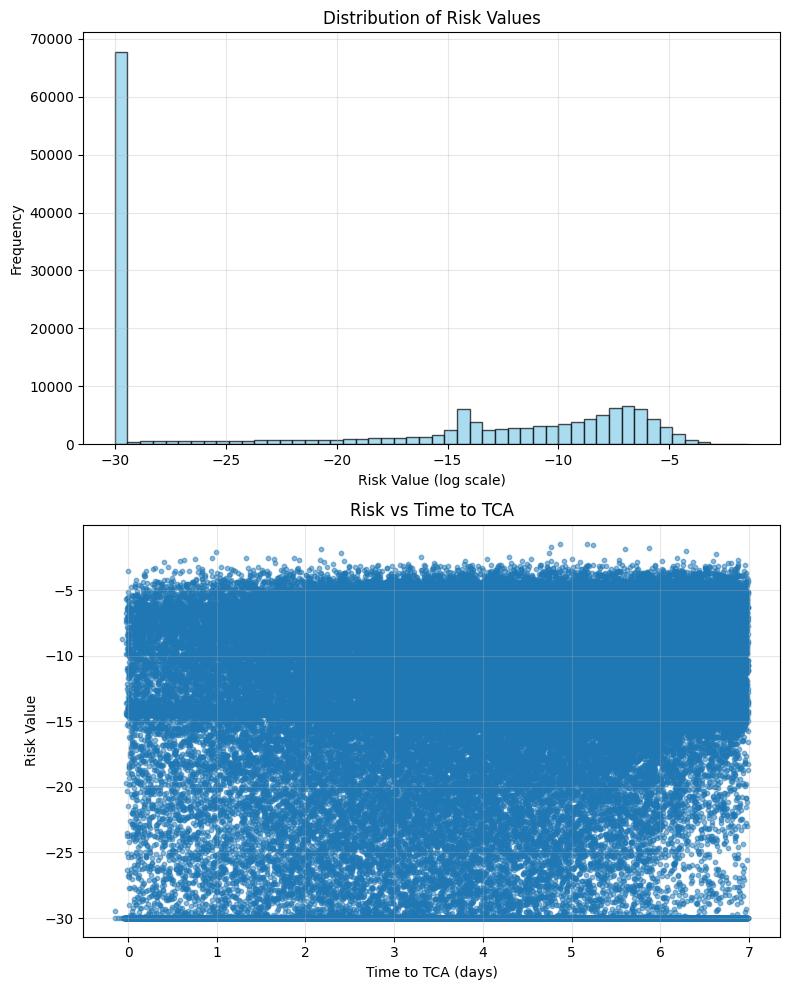

Data visualization complete!


In [43]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# 1. Target distribution
axes[0].hist(y, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Risk Value (log scale)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Risk Values')
axes[0].grid(True, alpha=0.3)

# 2. Time to TCA vs Risk (if time_to_tca exists)
if 'time_to_tca' in df_processed.columns:
    axes[1].scatter(df_processed['time_to_tca'], y, alpha=0.5, s=10)
    axes[1].set_xlabel('Time to TCA (days)')
    axes[1].set_ylabel('Risk Value')
    axes[1].set_title('Risk vs Time to TCA')
    axes[1].grid(True, alpha=0.3)
else:
    axes[1].text(0.5, 0.5, 'Time to TCA\nnot available', ha='center', va='center')

plt.tight_layout()
plt.show()

print("Data visualization complete!")


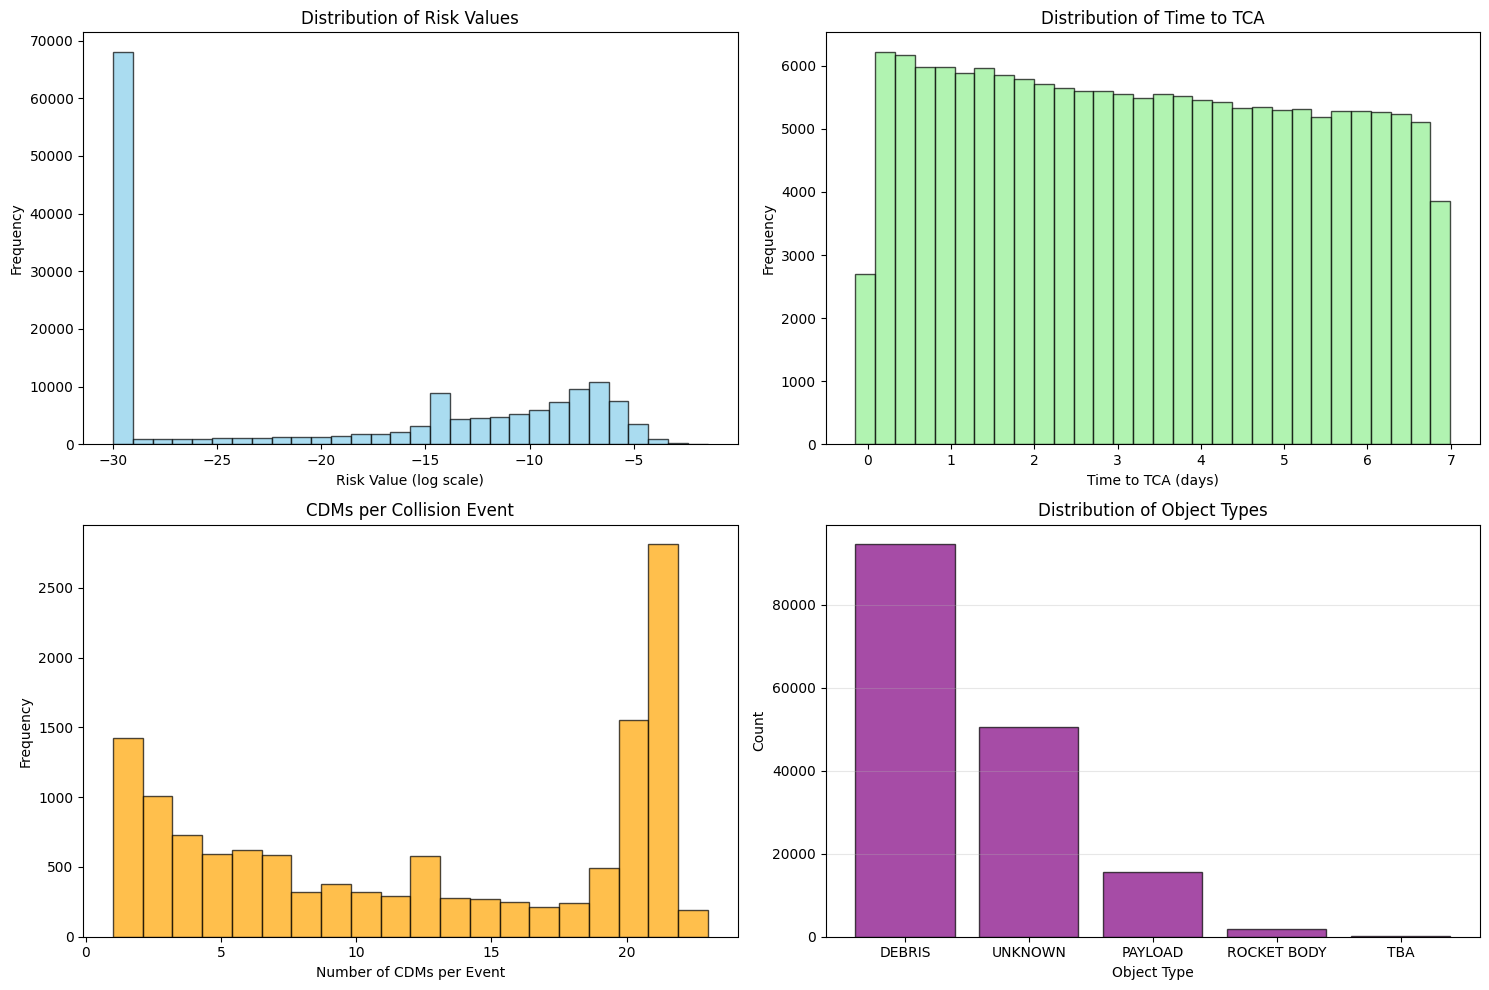

In [48]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Risk distribution
axes[0, 0].hist(df['risk'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Risk Value (log scale)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Risk Values')

# 2. Time to TCA distribution
axes[0, 1].hist(df['time_to_tca'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_xlabel('Time to TCA (days)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Time to TCA')

# 3. CDMs per event
cdm_counts = df['event_id'].value_counts()
axes[1, 0].hist(cdm_counts, bins=20, alpha=0.7, color='orange', edgecolor='black')
axes[1, 0].set_xlabel('Number of CDMs per Event')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('CDMs per Collision Event')

# 4. Object type distribution as BAR CHART
if 'c_object_type' in df.columns:
    object_counts = df['c_object_type'].value_counts()
    axes[1, 1].bar(
        object_counts.index,
        object_counts.values,
        color='purple',
        alpha=0.7,
        edgecolor='black'
    )
    axes[1, 1].set_xlabel('Object Type')
    axes[1, 1].set_ylabel('Count')
    axes[1, 1].set_title('Distribution of Object Types')
    axes[1, 1].grid(axis='y', alpha=0.3)
else:
    axes[1, 1].text(0.5, 0.5, 'No object type data', ha='center', va='center')
    axes[1, 1].set_title('Object Type Distribution')

plt.tight_layout()
plt.show()


In [19]:

print(" SPLITTING DATA FOR ANALYSIS...")

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f" Data split completed:")
print(f"   - Training samples: {X_train.shape[0]}")
print(f"   - Testing samples: {X_test.shape[0]}")
print(f"   - Training ratio: {X_train.shape[0]/len(X):.1%}")

# Scale features for methods that require it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(" Features scaled for correlation and mutual information analysis")

 SPLITTING DATA FOR ANALYSIS...
 Data split completed:
   - Training samples: 130107
   - Testing samples: 32527
   - Training ratio: 80.0%
 Features scaled for correlation and mutual information analysis


In [20]:
print("=" * 60)
print(" METHOD 1: CORRELATION ANALYSIS")
print("=" * 60)

def calculate_correlations(X, y, feature_names):
    """Calculate Pearson and Spearman correlations"""
    pearson_corrs = []
    spearman_corrs = []

    for feature in feature_names:
        # Pearson correlation (linear relationship)
        pearson_corr, _ = pearsonr(X[feature], y)
        pearson_corrs.append(abs(pearson_corr))

        # Spearman correlation (monotonic relationship)
        spearman_corr, _ = spearmanr(X[feature], y)
        spearman_corrs.append(abs(spearman_corr))

    return pearson_corrs, spearman_corrs

# Calculate correlations
print(" Calculating Pearson and Spearman correlations...")
pearson_scores, spearman_scores = calculate_correlations(X_train, y_train, feature_cols)

# Create correlation dataframe
correlation_df = pd.DataFrame({
    'feature': feature_cols,
    'pearson_correlation': pearson_scores,
    'spearman_correlation': spearman_scores
})

# Sort by Pearson correlation
correlation_df_pearson = correlation_df.sort_values('pearson_correlation', ascending=False)
# Sort by Spearman correlation
correlation_df_spearman = correlation_df.sort_values('spearman_correlation', ascending=False)

print(" Correlation analysis completed!")
print(f"\n TOP 10 FEATURES - PEARSON CORRELATION:")
print(correlation_df_pearson.head(10)[['feature', 'pearson_correlation']])

print(f"\n TOP 10 FEATURES - SPEARMAN CORRELATION:")
print(correlation_df_spearman.head(10)[['feature', 'spearman_correlation']])

 METHOD 1: CORRELATION ANALYSIS
 Calculating Pearson and Spearman correlations...
 Correlation analysis completed!

 TOP 10 FEATURES - PEARSON CORRELATION:
                  feature  pearson_correlation
0             time_to_tca             0.516745
43      c_time_lastob_end             0.378932
42    c_time_lastob_start             0.366900
81   mahalanobis_distance             0.294272
2       max_risk_estimate             0.224030
63              c_ctdot_r             0.191110
47             c_obs_used             0.187313
46        c_obs_available             0.157557
4           miss_distance             0.157496
101   object_type_PAYLOAD             0.129743

 TOP 10 FEATURES - SPEARMAN CORRELATION:
                      feature  spearman_correlation
3            max_risk_scaling              0.920687
87                  c_sigma_t              0.585946
91               c_sigma_rdot              0.548778
83  c_position_covariance_det              0.541165
81       mahalanobis_dist

 Creating correlation visualizations...


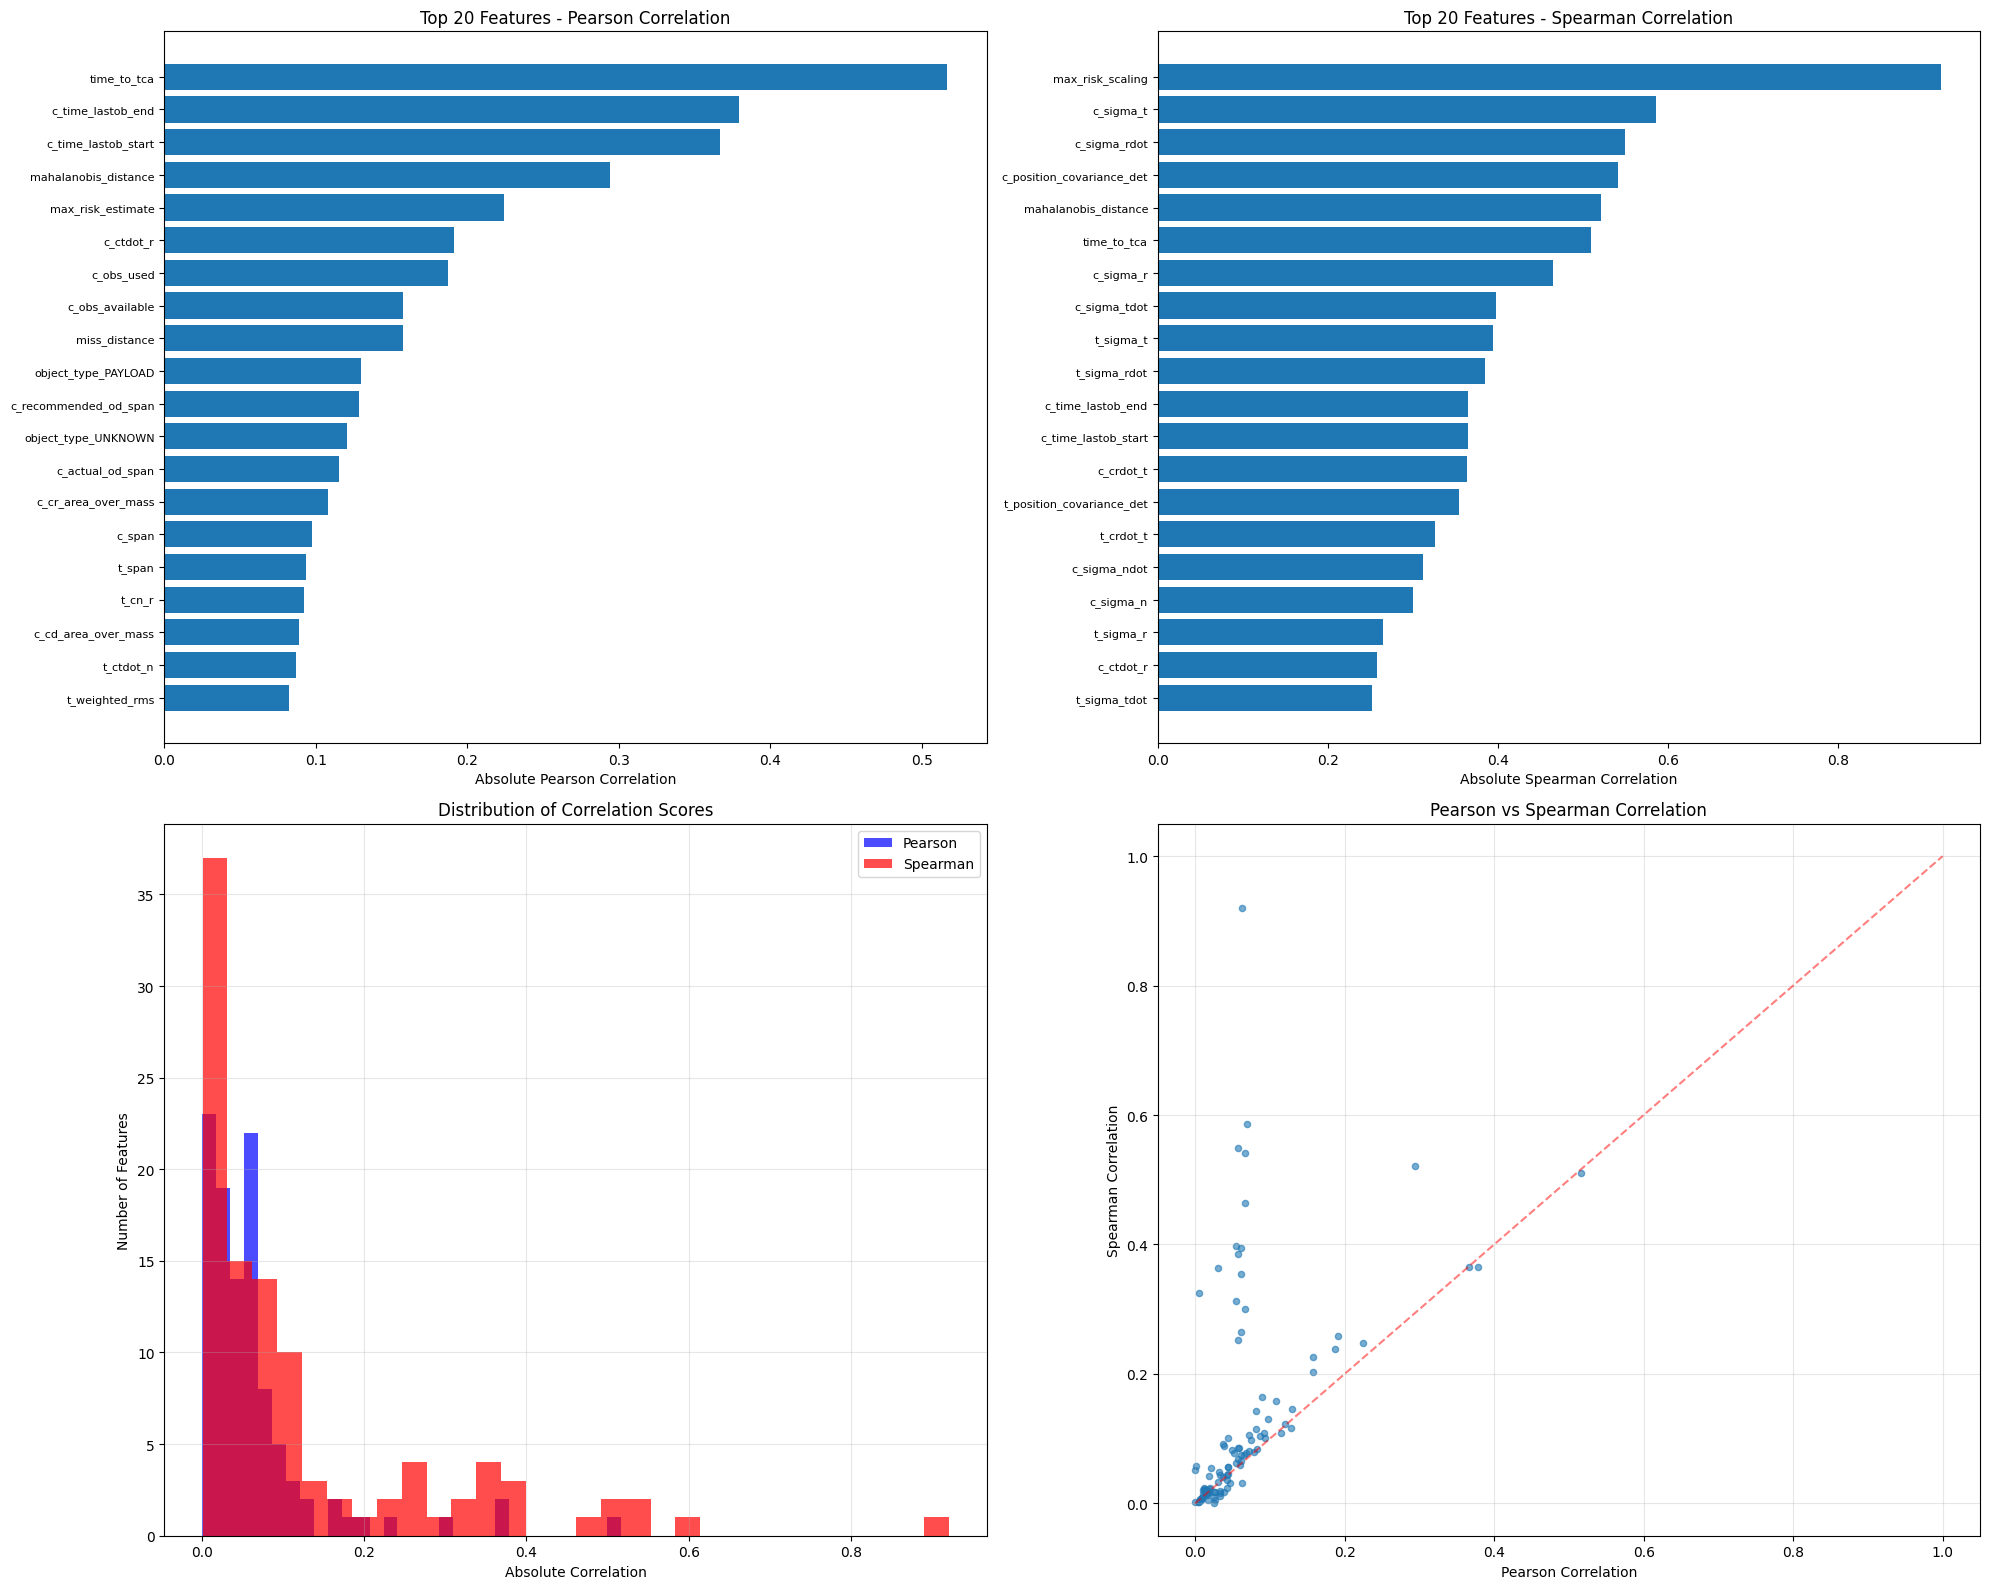

 Correlation visualizations completed!


In [21]:
# CELL 9: VISUALIZE CORRELATION RESULTS
# ============================================================================
# Create visualizations for correlation analysis

print(" Creating correlation visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Top 20 Pearson correlations
top20_pearson = correlation_df_pearson.head(20)
axes[0, 0].barh(range(len(top20_pearson)), top20_pearson['pearson_correlation'])
axes[0, 0].set_yticks(range(len(top20_pearson)))
axes[0, 0].set_yticklabels(top20_pearson['feature'], fontsize=8)
axes[0, 0].set_xlabel('Absolute Pearson Correlation')
axes[0, 0].set_title('Top 20 Features - Pearson Correlation')
axes[0, 0].invert_yaxis()

# 2. Top 20 Spearman correlations
top20_spearman = correlation_df_spearman.head(20)
axes[0, 1].barh(range(len(top20_spearman)), top20_spearman['spearman_correlation'])
axes[0, 1].set_yticks(range(len(top20_spearman)))
axes[0, 1].set_yticklabels(top20_spearman['feature'], fontsize=8)
axes[0, 1].set_xlabel('Absolute Spearman Correlation')
axes[0, 1].set_title('Top 20 Features - Spearman Correlation')
axes[0, 1].invert_yaxis()

# 3. Correlation distribution
axes[1, 0].hist(pearson_scores, bins=30, alpha=0.7, label='Pearson', color='blue')
axes[1, 0].hist(spearman_scores, bins=30, alpha=0.7, label='Spearman', color='red')
axes[1, 0].set_xlabel('Absolute Correlation')
axes[1, 0].set_ylabel('Number of Features')
axes[1, 0].set_title('Distribution of Correlation Scores')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Pearson vs Spearman comparison
axes[1, 1].scatter(pearson_scores, spearman_scores, alpha=0.6, s=20)
axes[1, 1].plot([0, 1], [0, 1], 'r--', alpha=0.5)  # Diagonal line
axes[1, 1].set_xlabel('Pearson Correlation')
axes[1, 1].set_ylabel('Spearman Correlation')
axes[1, 1].set_title('Pearson vs Spearman Correlation')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(" Correlation visualizations completed!")


In [23]:
print("=" * 60)
print(" METHOD 2: MUTUAL INFORMATION ANALYSIS")
print("=" * 60)


# Calculate mutual information
mi_scores = mutual_info_regression(X_train_scaled, y_train, random_state=42)

# Create mutual information dataframe
mi_df = pd.DataFrame({
    'feature': feature_cols,
    'mutual_information': mi_scores
}).sort_values('mutual_information', ascending=False)

print(" Mutual information analysis completed!")
print(f"\n TOP 15 FEATURES - MUTUAL INFORMATION:")
print(mi_df.head(15))

# Normalize MI scores for better interpretation
mi_df['mi_normalized'] = mi_df['mutual_information'] / mi_df['mutual_information'].max()

 METHOD 2: MUTUAL INFORMATION ANALYSIS
 Mutual information analysis completed!

 TOP 15 FEATURES - MUTUAL INFORMATION:
                feature  mutual_information
3      max_risk_scaling            0.881082
79              azimuth            0.707349
77              c_h_per            0.667804
11  relative_velocity_n            0.634681
10  relative_velocity_t            0.629876
51  c_cd_area_over_mass            0.592784
56            c_j2k_inc            0.569287
24            t_j2k_sma            0.561248
75              t_h_per            0.541229
54            c_j2k_sma            0.536159
5        relative_speed            0.535177
78  geocentric_latitude            0.526401
74              t_h_apo            0.509257
52  c_cr_area_over_mass            0.504424
45     c_actual_od_span            0.495584


 Creating mutual information visualizations...


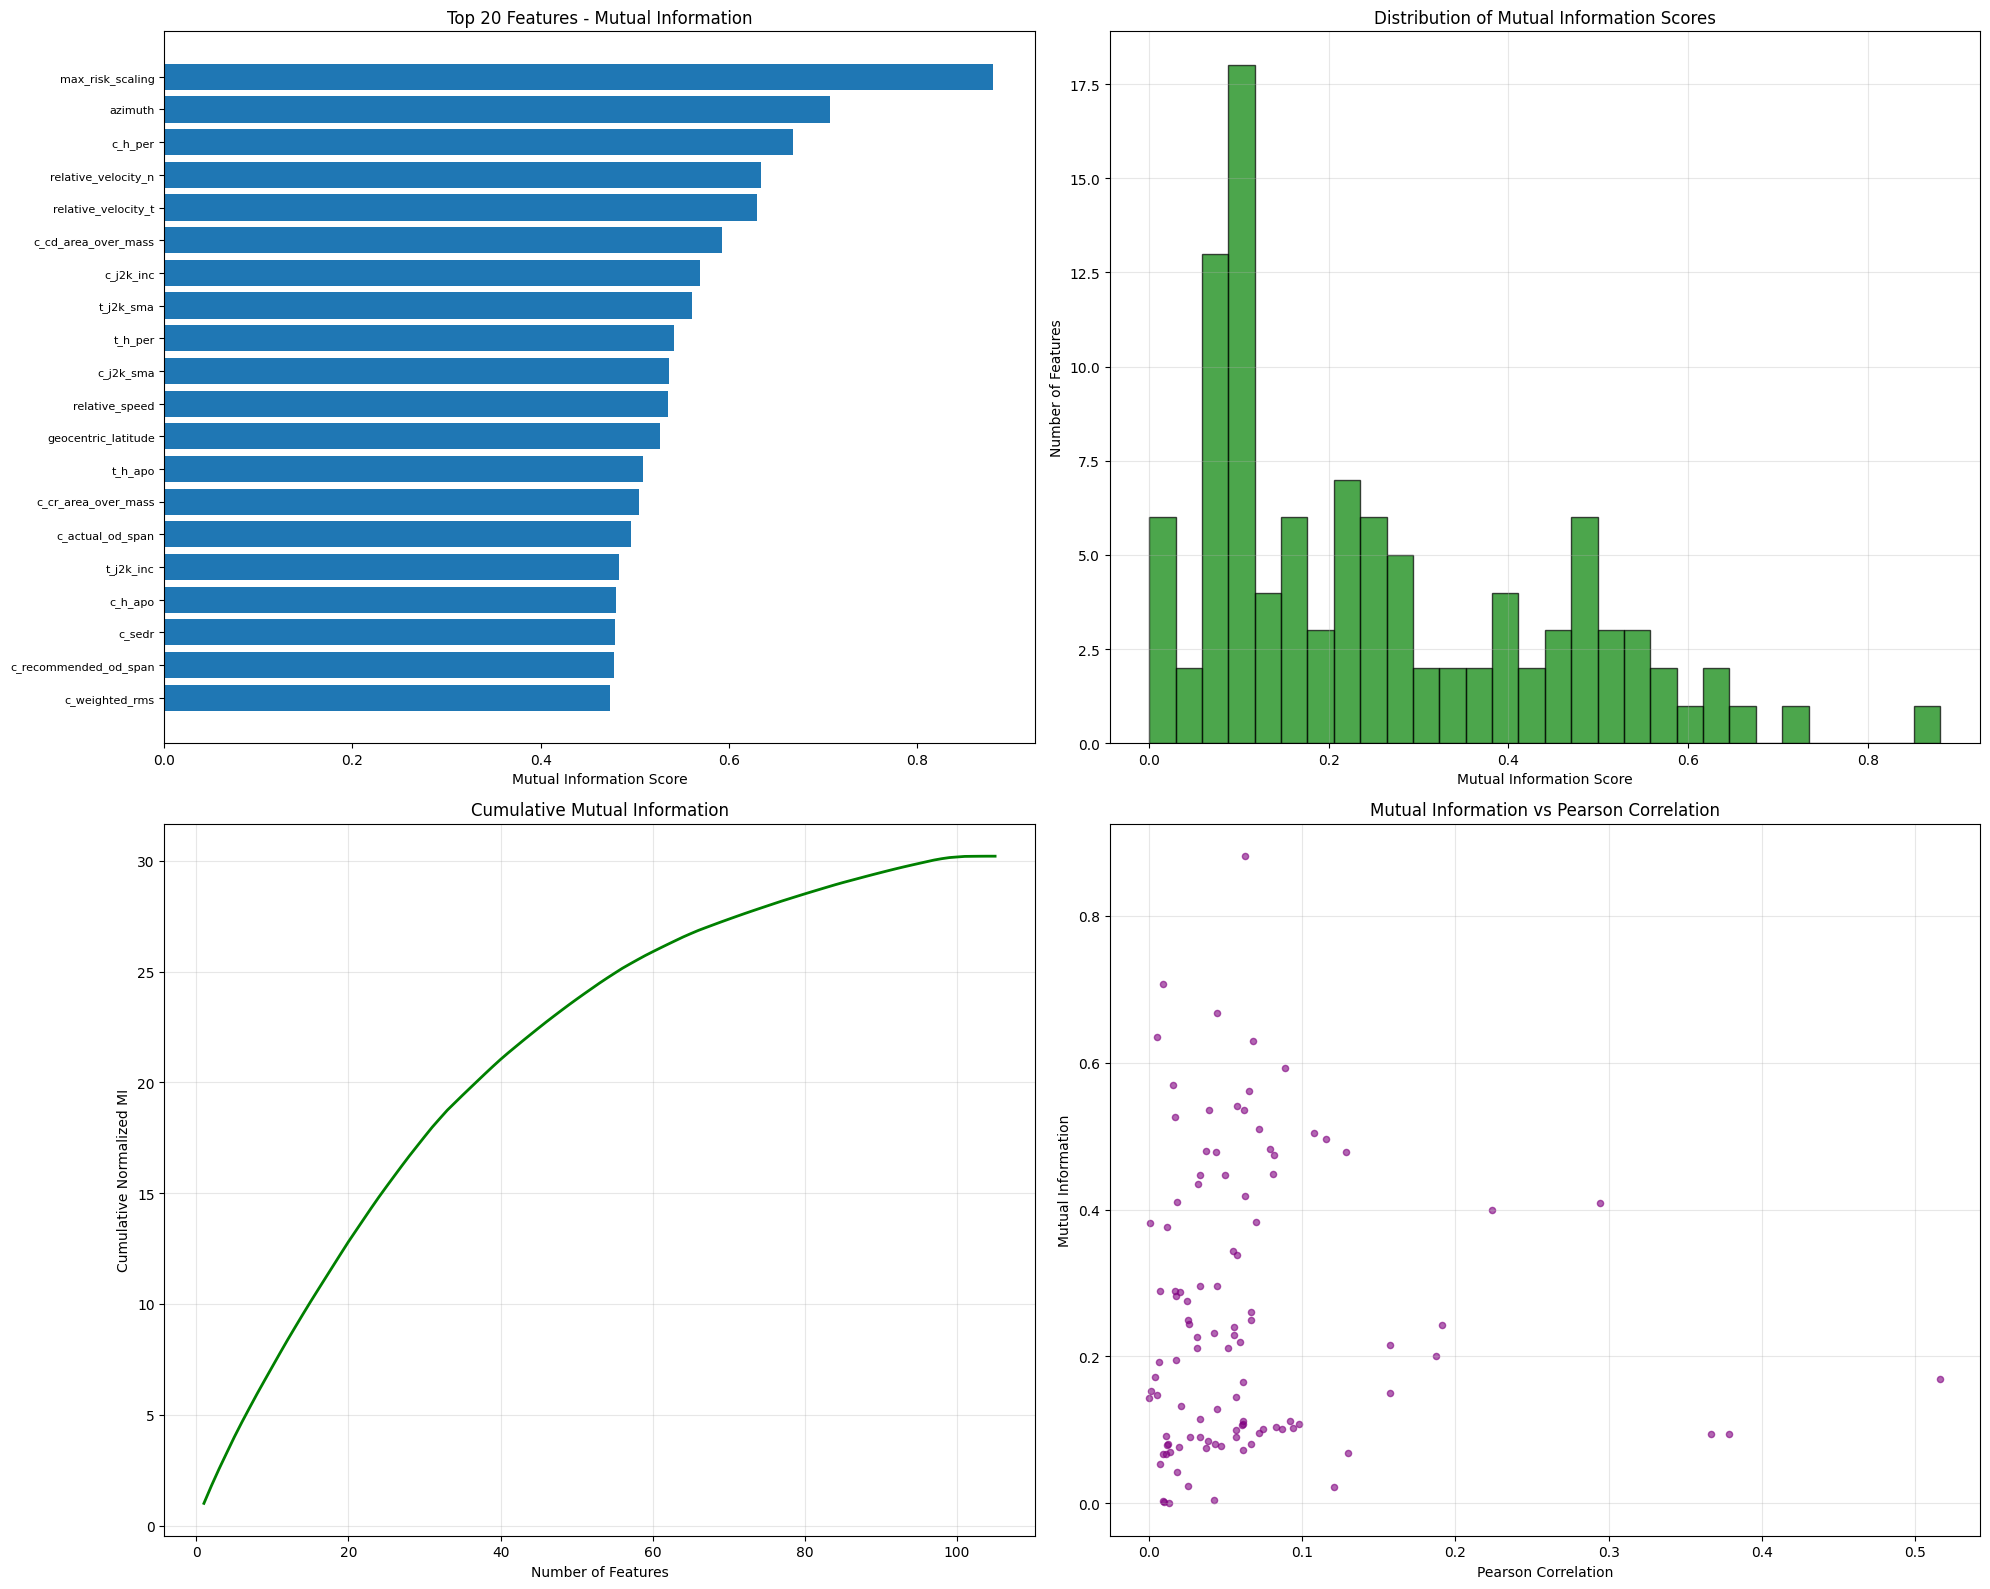

 Mutual information visualizations completed!


In [24]:

print(" Creating mutual information visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Top 20 MI scores
top20_mi = mi_df.head(20)
axes[0, 0].barh(range(len(top20_mi)), top20_mi['mutual_information'])
axes[0, 0].set_yticks(range(len(top20_mi)))
axes[0, 0].set_yticklabels(top20_mi['feature'], fontsize=8)
axes[0, 0].set_xlabel('Mutual Information Score')
axes[0, 0].set_title('Top 20 Features - Mutual Information')
axes[0, 0].invert_yaxis()

# 2. MI score distribution
axes[0, 1].hist(mi_scores, bins=30, alpha=0.7, color='green', edgecolor='black')
axes[0, 1].set_xlabel('Mutual Information Score')
axes[0, 1].set_ylabel('Number of Features')
axes[0, 1].set_title('Distribution of Mutual Information Scores')
axes[0, 1].grid(True, alpha=0.3)

# 3. Cumulative MI importance
cumulative_mi = np.cumsum(mi_df['mi_normalized'].values)
axes[1, 0].plot(range(1, len(cumulative_mi) + 1), cumulative_mi, 'g-', linewidth=2)
axes[1, 0].set_xlabel('Number of Features')
axes[1, 0].set_ylabel('Cumulative Normalized MI')
axes[1, 0].set_title('Cumulative Mutual Information')
axes[1, 0].grid(True, alpha=0.3)

# 4. MI vs Pearson correlation comparison
mi_pearson_merged = pd.merge(
    mi_df[['feature', 'mutual_information']],
    correlation_df[['feature', 'pearson_correlation']],
    on='feature'
)
axes[1, 1].scatter(mi_pearson_merged['pearson_correlation'],
                   mi_pearson_merged['mutual_information'],
                   alpha=0.6, s=20, color='purple')
axes[1, 1].set_xlabel('Pearson Correlation')
axes[1, 1].set_ylabel('Mutual Information')
axes[1, 1].set_title('Mutual Information vs Pearson Correlation')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(" Mutual information visualizations completed!")

In [25]:
print("=" * 60)
print(" METHOD 3: XGBOOST FEATURE IMPORTANCE")
print("=" * 60)

print(" Training XGBoost model...")

# Train XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric='rmse'
)

# Fit the model using scaled data
xgb_model.fit(X_train_scaled, y_train)

# Get feature importance
xgb_importance = xgb_model.feature_importances_

# Create XGBoost importance dataframe
xgb_df = pd.DataFrame({
    'feature': feature_cols,
    'xgb_importance': xgb_importance
}).sort_values('xgb_importance', ascending=False)

# Evaluate model performance
y_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(" XGBoost model trained successfully!")
print(f" Model Performance:")
print(f"   - R² Score: {xgb_r2:.4f}")
print(f"   - RMSE: {xgb_rmse:.4f}")

print(f"\n TOP 15 FEATURES - XGBOOST IMPORTANCE:")
print(xgb_df.head(15))

 METHOD 3: XGBOOST FEATURE IMPORTANCE
 Training XGBoost model...
 XGBoost model trained successfully!
 Model Performance:
   - R² Score: 0.9999
   - RMSE: 0.1002

 TOP 15 FEATURES - XGBOOST IMPORTANCE:
                       feature  xgb_importance
3             max_risk_scaling        0.938597
81        mahalanobis_distance        0.051088
2            max_risk_estimate        0.005365
73                      c_span        0.000662
4                miss_distance        0.000529
72                      t_span        0.000308
54                   c_j2k_sma        0.000300
101        object_type_PAYLOAD        0.000272
44       c_recommended_od_span        0.000236
47                  c_obs_used        0.000177
46             c_obs_available        0.000169
86                   t_sigma_t        0.000114
82   t_position_covariance_det        0.000110
93                c_sigma_tdot        0.000099
89                   c_sigma_n        0.000093


In [26]:
print("=" * 60)
print(" METHOD 4: PERMUTATION IMPORTANCE")
print("=" * 60)

print(" Calculating permutation importance...")
print(" This may take several minutes...")

# Calculate permutation importance
perm_importance = permutation_importance(
    xgb_model, X_test, y_test,
    n_repeats=10,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Create permutation importance dataframe
perm_df = pd.DataFrame({
    'feature': feature_cols,
    'perm_importance': perm_importance.importances_mean,
    'perm_std': perm_importance.importances_std
}).sort_values('perm_importance', ascending=False)

print(" Permutation importance analysis completed!")
print(f"\n TOP 15 FEATURES - PERMUTATION IMPORTANCE:")
print(perm_df.head(15))

 METHOD 4: PERMUTATION IMPORTANCE
 Calculating permutation importance...
 This may take several minutes...
 Permutation importance analysis completed!

 TOP 15 FEATURES - PERMUTATION IMPORTANCE:
                  feature  perm_importance  perm_std
71           c_cndot_tdot         0.039261  0.002477
67              c_cndot_r         0.009863  0.000592
57                 c_ct_r         0.008949  0.000748
6     relative_position_r         0.006254  0.001087
68              c_cndot_t         0.005732  0.000652
7     relative_position_t         0.005556  0.001127
64              c_ctdot_t         0.004148  0.000799
65              c_ctdot_n         0.003465  0.000187
70           c_cndot_rdot         0.003163  0.000407
30              t_crdot_r         0.002704  0.000248
8     relative_position_n         0.002529  0.000604
60              c_crdot_r         0.002024  0.000260
32              t_crdot_n         0.001983  0.000205
14  t_recommended_od_span         0.001465  0.000215
39        

 Creating tree-based importance visualizations...


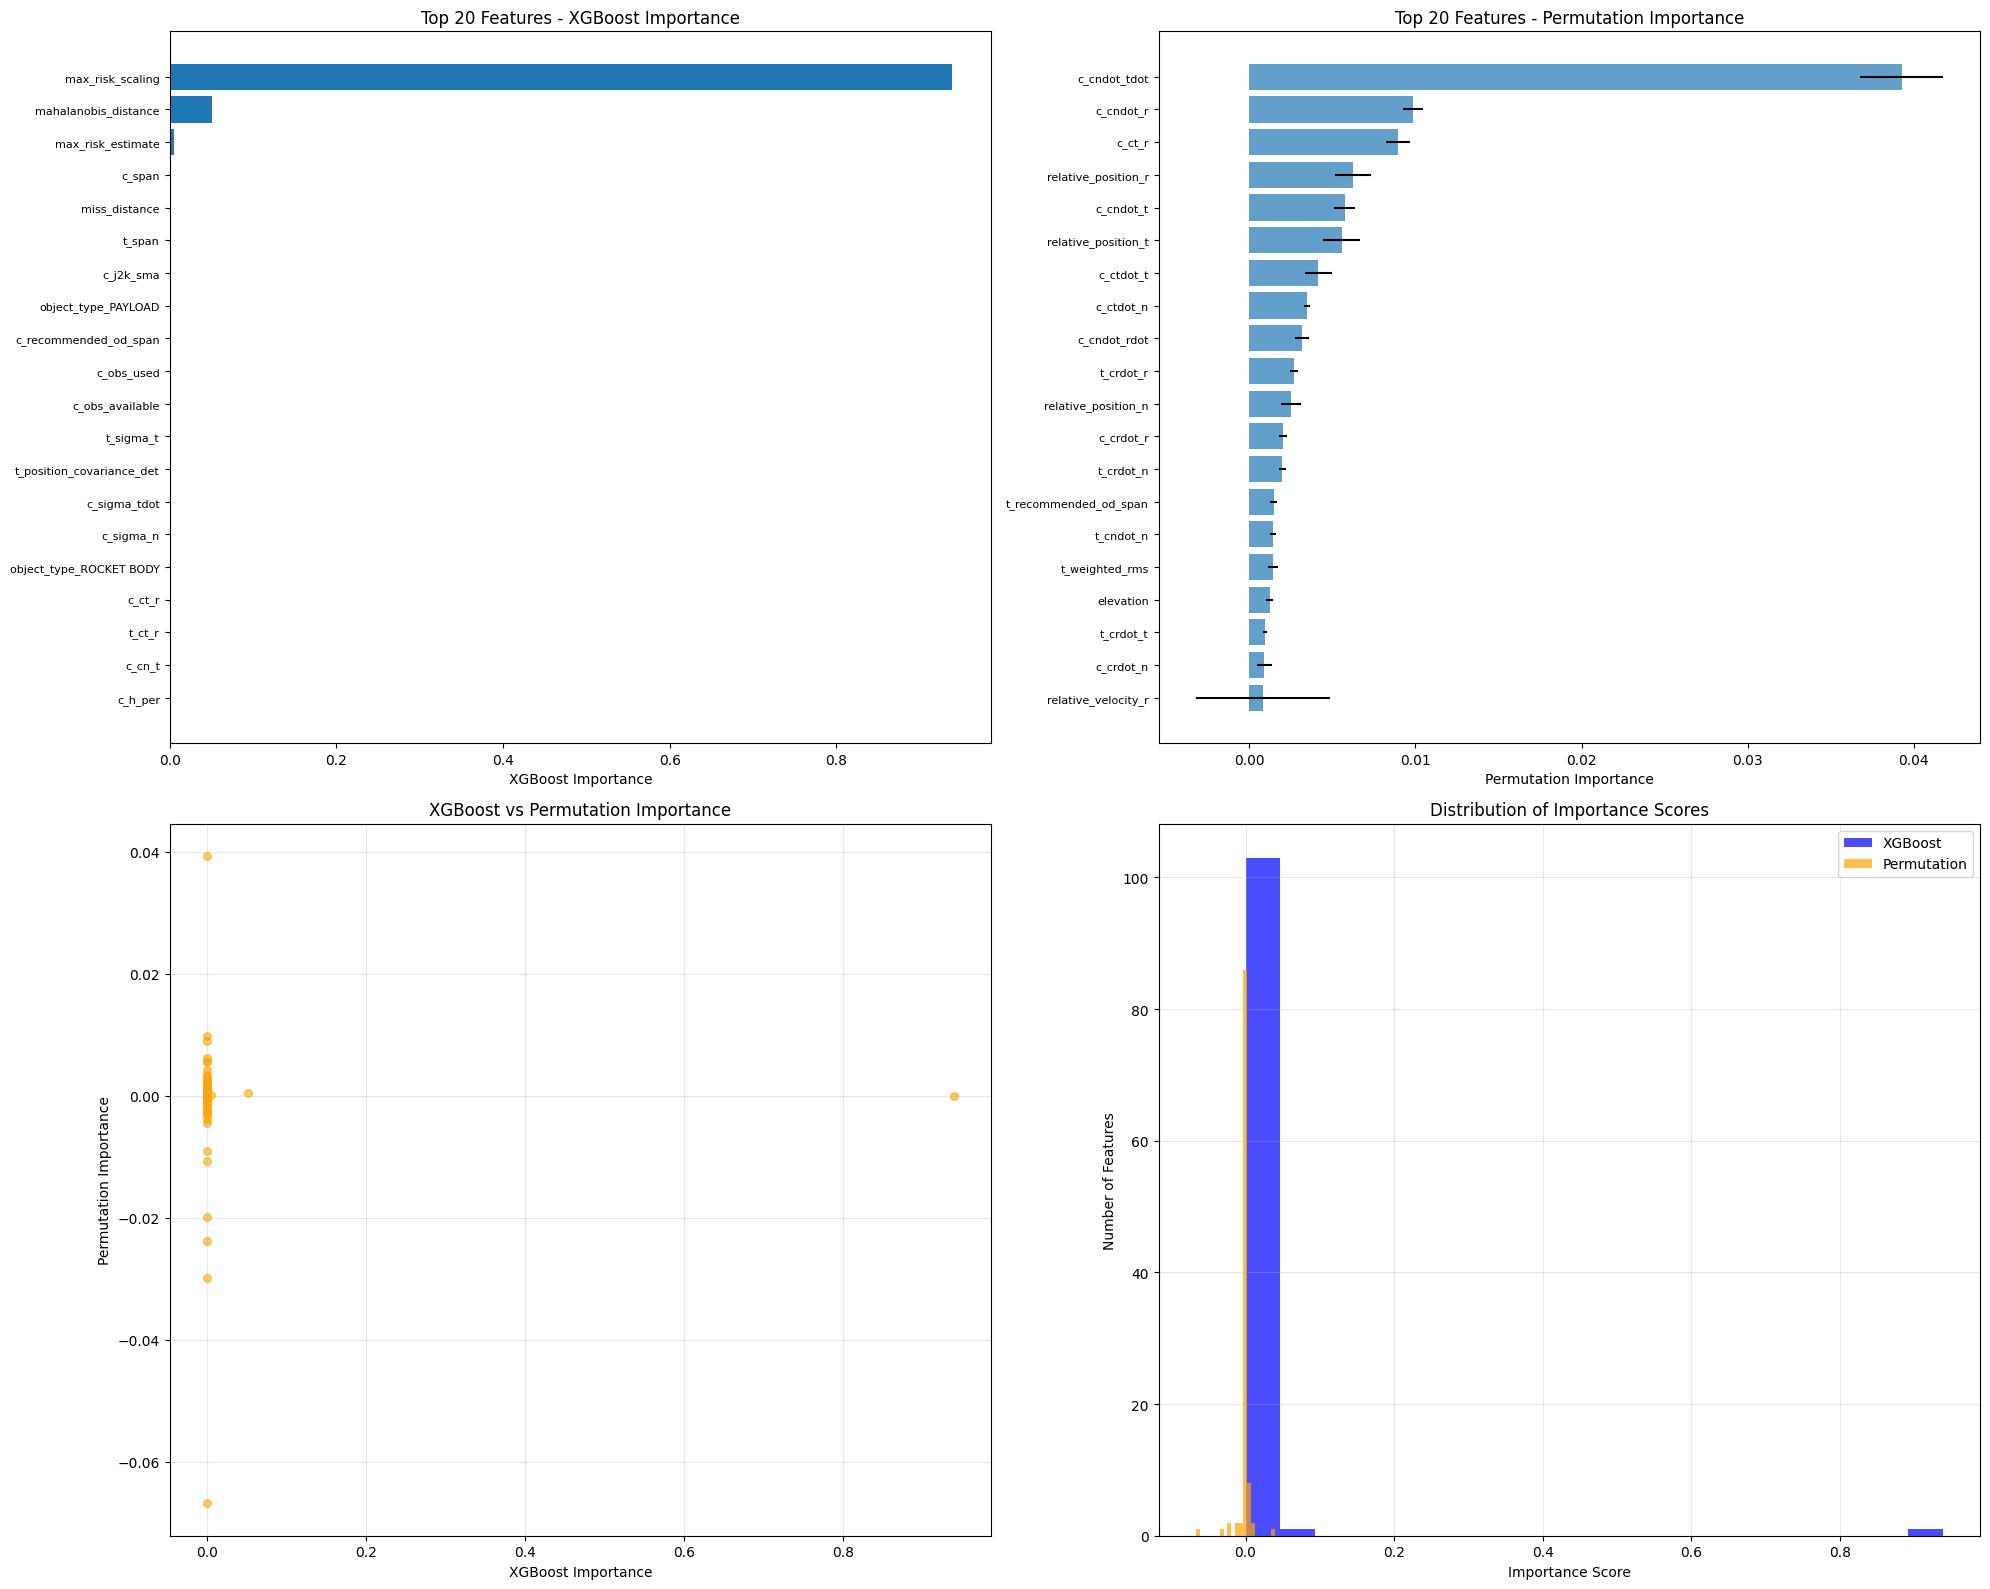

 Tree-based importance visualizations completed!


In [27]:
print(" Creating tree-based importance visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Top 20 XGBoost importance
top20_xgb = xgb_df.head(20)
axes[0, 0].barh(range(len(top20_xgb)), top20_xgb['xgb_importance'])
axes[0, 0].set_yticks(range(len(top20_xgb)))
axes[0, 0].set_yticklabels(top20_xgb['feature'], fontsize=8)
axes[0, 0].set_xlabel('XGBoost Importance')
axes[0, 0].set_title('Top 20 Features - XGBoost Importance')
axes[0, 0].invert_yaxis()

# 2. Top 20 permutation importance with error bars
top20_perm = perm_df.head(20)
y_pos = range(len(top20_perm))
axes[0, 1].barh(y_pos, top20_perm['perm_importance'],
                xerr=top20_perm['perm_std'], alpha=0.7)
axes[0, 1].set_yticks(y_pos)
axes[0, 1].set_yticklabels(top20_perm['feature'], fontsize=8)
axes[0, 1].set_xlabel('Permutation Importance')
axes[0, 1].set_title('Top 20 Features - Permutation Importance')
axes[0, 1].invert_yaxis()

# 3. XGBoost vs Permutation importance comparison
xgb_perm_merged = pd.merge(
    xgb_df[['feature', 'xgb_importance']],
    perm_df[['feature', 'perm_importance']],
    on='feature'
)
axes[1, 0].scatter(xgb_perm_merged['xgb_importance'],
                   xgb_perm_merged['perm_importance'],
                   alpha=0.6, s=30, color='orange')
axes[1, 0].set_xlabel('XGBoost Importance')
axes[1, 0].set_ylabel('Permutation Importance')
axes[1, 0].set_title('XGBoost vs Permutation Importance')
axes[1, 0].grid(True, alpha=0.3)

# 4. Importance distribution comparison
axes[1, 1].hist(xgb_importance, bins=20, alpha=0.7, label='XGBoost', color='blue')
axes[1, 1].hist(perm_df['perm_importance'], bins=20, alpha=0.7, label='Permutation', color='orange')
axes[1, 1].set_xlabel('Importance Score')
axes[1, 1].set_ylabel('Number of Features')
axes[1, 1].set_title('Distribution of Importance Scores')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(" Tree-based importance visualizations completed!")

In [28]:
print("=" * 60)
print(" METHOD 5: SHAP VALUES ANALYSIS")
print("=" * 60)

print(" Initializing SHAP explainer...")
print(" This may take a few minutes...")

import shap # Import the SHAP library

# Create SHAP explainer
explainer = shap.Explainer(xgb_model, X_train_scaled) # Use scaled training data

# Calculate SHAP values for a sample of test data (for speed)
sample_size = min(500, len(X_test_scaled))  # Use sample for faster computation with scaled data
X_test_sample = X_test_scaled[:sample_size]

print(f" Calculating SHAP values for {sample_size} samples...")
shap_values = explainer(X_test_sample)

# Calculate mean absolute SHAP values for feature importance
mean_shap_values = np.abs(shap_values.values).mean(axis=0)

# Create SHAP importance dataframe
# Use the original feature names from feature_cols as the scaled data is a numpy array
shap_df = pd.DataFrame({
    'feature': feature_cols,
    'shap_importance': mean_shap_values
}).sort_values('shap_importance', ascending=False)

print(" SHAP analysis completed!")
print(f"\n TOP 15 FEATURES - SHAP IMPORTANCE:")
print(shap_df.head(15))

 METHOD 5: SHAP VALUES ANALYSIS
 Initializing SHAP explainer...
 This may take a few minutes...
 Calculating SHAP values for 500 samples...
 SHAP analysis completed!

 TOP 15 FEATURES - SHAP IMPORTANCE:
                  feature  shap_importance
3        max_risk_scaling         9.293521
2       max_risk_estimate         0.485122
81   mahalanobis_distance         0.181527
4           miss_distance         0.019180
72                 t_span         0.012448
93           c_sigma_tdot         0.008875
73                 c_span         0.008201
85              c_sigma_r         0.008034
87              c_sigma_t         0.007215
20         t_rcs_estimate         0.005782
50         c_rcs_estimate         0.004472
57                 c_ct_r         0.004302
5          relative_speed         0.004063
44  c_recommended_od_span         0.003140
61              c_crdot_t         0.002726


Creating SHAP visualizations...


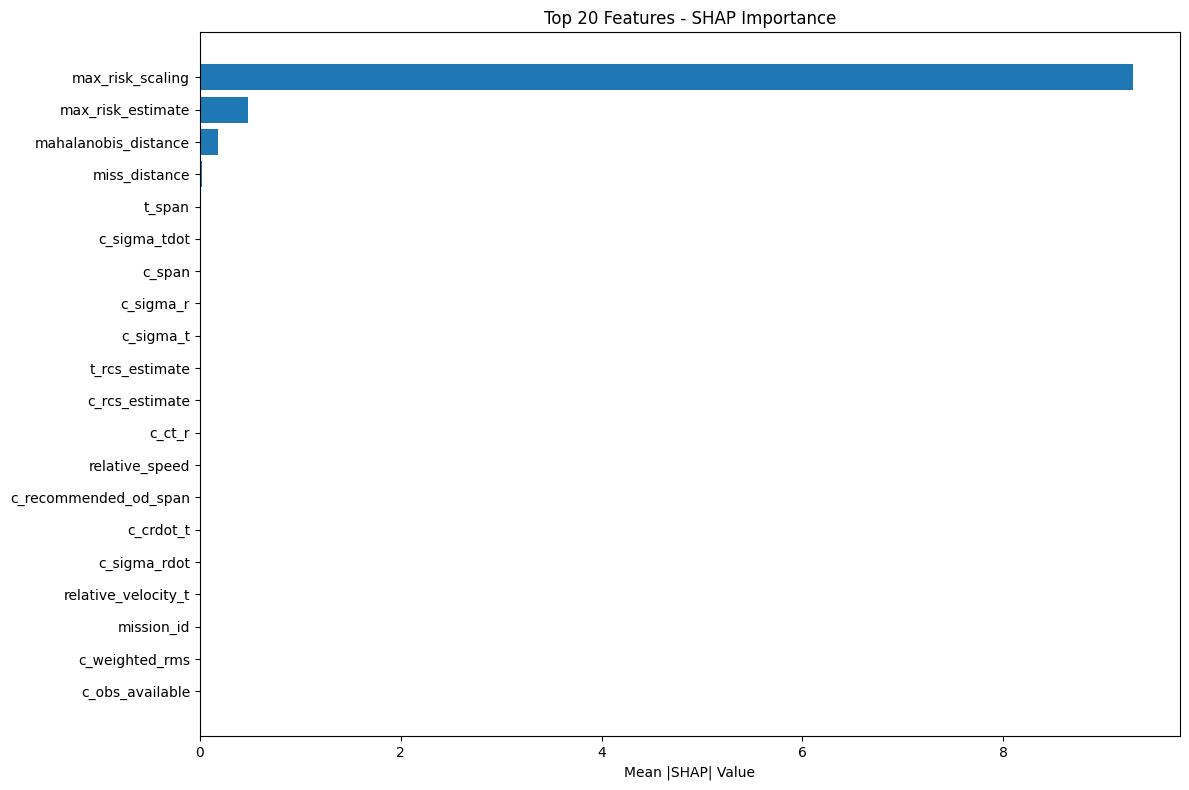

In [53]:
print("Creating SHAP visualizations...")

# Set up the plotting (one subplot only)
fig, ax = plt.subplots(1, figsize=(12, 8))  # (width, height) in inches

# 1. SHAP summary plot (bar)
top20_shap = shap_df.head(20)
ax.barh(range(len(top20_shap)), top20_shap['shap_importance'])
ax.set_yticks(range(len(top20_shap)))
ax.set_yticklabels(top20_shap['feature'], fontsize=10)
ax.set_xlabel('Mean |SHAP| Value')
ax.set_title('Top 20 Features - SHAP Importance')
ax.invert_yaxis()

plt.tight_layout()
plt.show()




In [30]:
print("=" * 60)
print(" ENSEMBLE FEATURE RANKING")
print("=" * 60)

print(" Combining results from all methods...")

# Normalize all importance scores to 0-1 range for fair comparison
def normalize_scores(scores):
    return (scores - scores.min()) / (scores.max() - scores.min())

# Create master dataframe with all results
master_df = pd.DataFrame({'feature': feature_cols})

# Add normalized scores from each method
master_df = master_df.merge(correlation_df[['feature', 'pearson_correlation']], on='feature')
master_df = master_df.merge(correlation_df[['feature', 'spearman_correlation']], on='feature')
master_df = master_df.merge(mi_df[['feature', 'mutual_information']], on='feature')
master_df = master_df.merge(xgb_df[['feature', 'xgb_importance']], on='feature')
master_df = master_df.merge(perm_df[['feature', 'perm_importance']], on='feature')
master_df = master_df.merge(shap_df[['feature', 'shap_importance']], on='feature')

# Normalize all scores
master_df['pearson_norm'] = normalize_scores(master_df['pearson_correlation'])
master_df['spearman_norm'] = normalize_scores(master_df['spearman_correlation'])
master_df['mi_norm'] = normalize_scores(master_df['mutual_information'])
master_df['xgb_norm'] = normalize_scores(master_df['xgb_importance'])
master_df['perm_norm'] = normalize_scores(master_df['perm_importance'])
master_df['shap_norm'] = normalize_scores(master_df['shap_importance'])

# Calculate ensemble score (weighted average)
# You can adjust these weights based on your preference
weights = {
    'pearson_norm': 0.15,
    'spearman_norm': 0.15,
    'mi_norm': 0.20,
    'xgb_norm': 0.20,
    'perm_norm': 0.15,
    'shap_norm': 0.15
}

master_df['ensemble_score'] = (
    master_df['pearson_norm'] * weights['pearson_norm'] +
    master_df['spearman_norm'] * weights['spearman_norm'] +
    master_df['mi_norm'] * weights['mi_norm'] +
    master_df['xgb_norm'] * weights['xgb_norm'] +
    master_df['perm_norm'] * weights['perm_norm'] +
    master_df['shap_norm'] * weights['shap_norm']
)

# Calculate coefficient of variation for each feature across normalized scores
cv_scores = []
for _, row in master_df.iterrows():
    scores = [row['pearson_norm'], row['spearman_norm'], row['mi_norm'],
              row['xgb_norm'], row['perm_norm'], row['shap_norm']]
    cv = np.std(scores) / np.mean(scores) if np.mean(scores) > 0 else 0
    cv_scores.append(cv)

master_df['stability_cv'] = cv_scores


# Sort by ensemble score
final_ranking = master_df.sort_values('ensemble_score', ascending=False).reset_index(drop=True)

# Calculate method agreement (how many methods put feature in top 20)
top_20_sets = {
    'pearson': set(correlation_df_pearson.head(20)['feature']),
    'spearman': set(correlation_df_spearman.head(20)['feature']),
    'mutual_info': set(mi_df.head(20)['feature']),
    'xgboost': set(xgb_df.head(20)['feature']),
    'permutation': set(perm_df.head(20)['feature']),
    'shap': set(shap_df.head(20)['feature'])
}

# Count agreement for top features
agreement_scores = []
for feature in final_ranking['feature']:
    agreement = sum(1 for method_set in top_20_sets.values() if feature in method_set)
    agreement_scores.append(agreement)

final_ranking['method_agreement'] = agreement_scores


print(" Ensemble ranking completed!")
print(f"\n TOP 20 FEATURES - ENSEMBLE RANKING:")
print(final_ranking[['feature', 'ensemble_score']].head(20))

print(f"\n TOP 10 FEATURES WITH HIGHEST METHOD AGREEMENT:")
high_agreement = final_ranking.sort_values('method_agreement', ascending=False)
print(high_agreement[['feature', 'ensemble_score', 'method_agreement']].head(10))

 ENSEMBLE FEATURE RANKING
 Combining results from all methods...
 Ensemble ranking completed!

 TOP 20 FEATURES - ENSEMBLE RANKING:
                  feature  ensemble_score
0        max_risk_scaling        0.812656
1    mahalanobis_distance        0.372017
2       max_risk_estimate        0.299397
3               c_sigma_t        0.297165
4     c_time_lastob_start        0.281666
5     c_cd_area_over_mass        0.281077
6       c_time_lastob_end        0.279066
7            c_sigma_rdot        0.277298
8             time_to_tca        0.271301
9     relative_velocity_t        0.269202
10                c_h_per        0.268030
11           c_cndot_tdot        0.265509
12  c_recommended_od_span        0.259604
13                azimuth        0.256556
14       c_actual_od_span        0.254400
15              t_j2k_sma        0.252846
16              c_sigma_r        0.248587
17         relative_speed        0.246096
18                t_h_per        0.245025
19         c_weighted_rms   

📊 Creating comprehensive results dashboard...


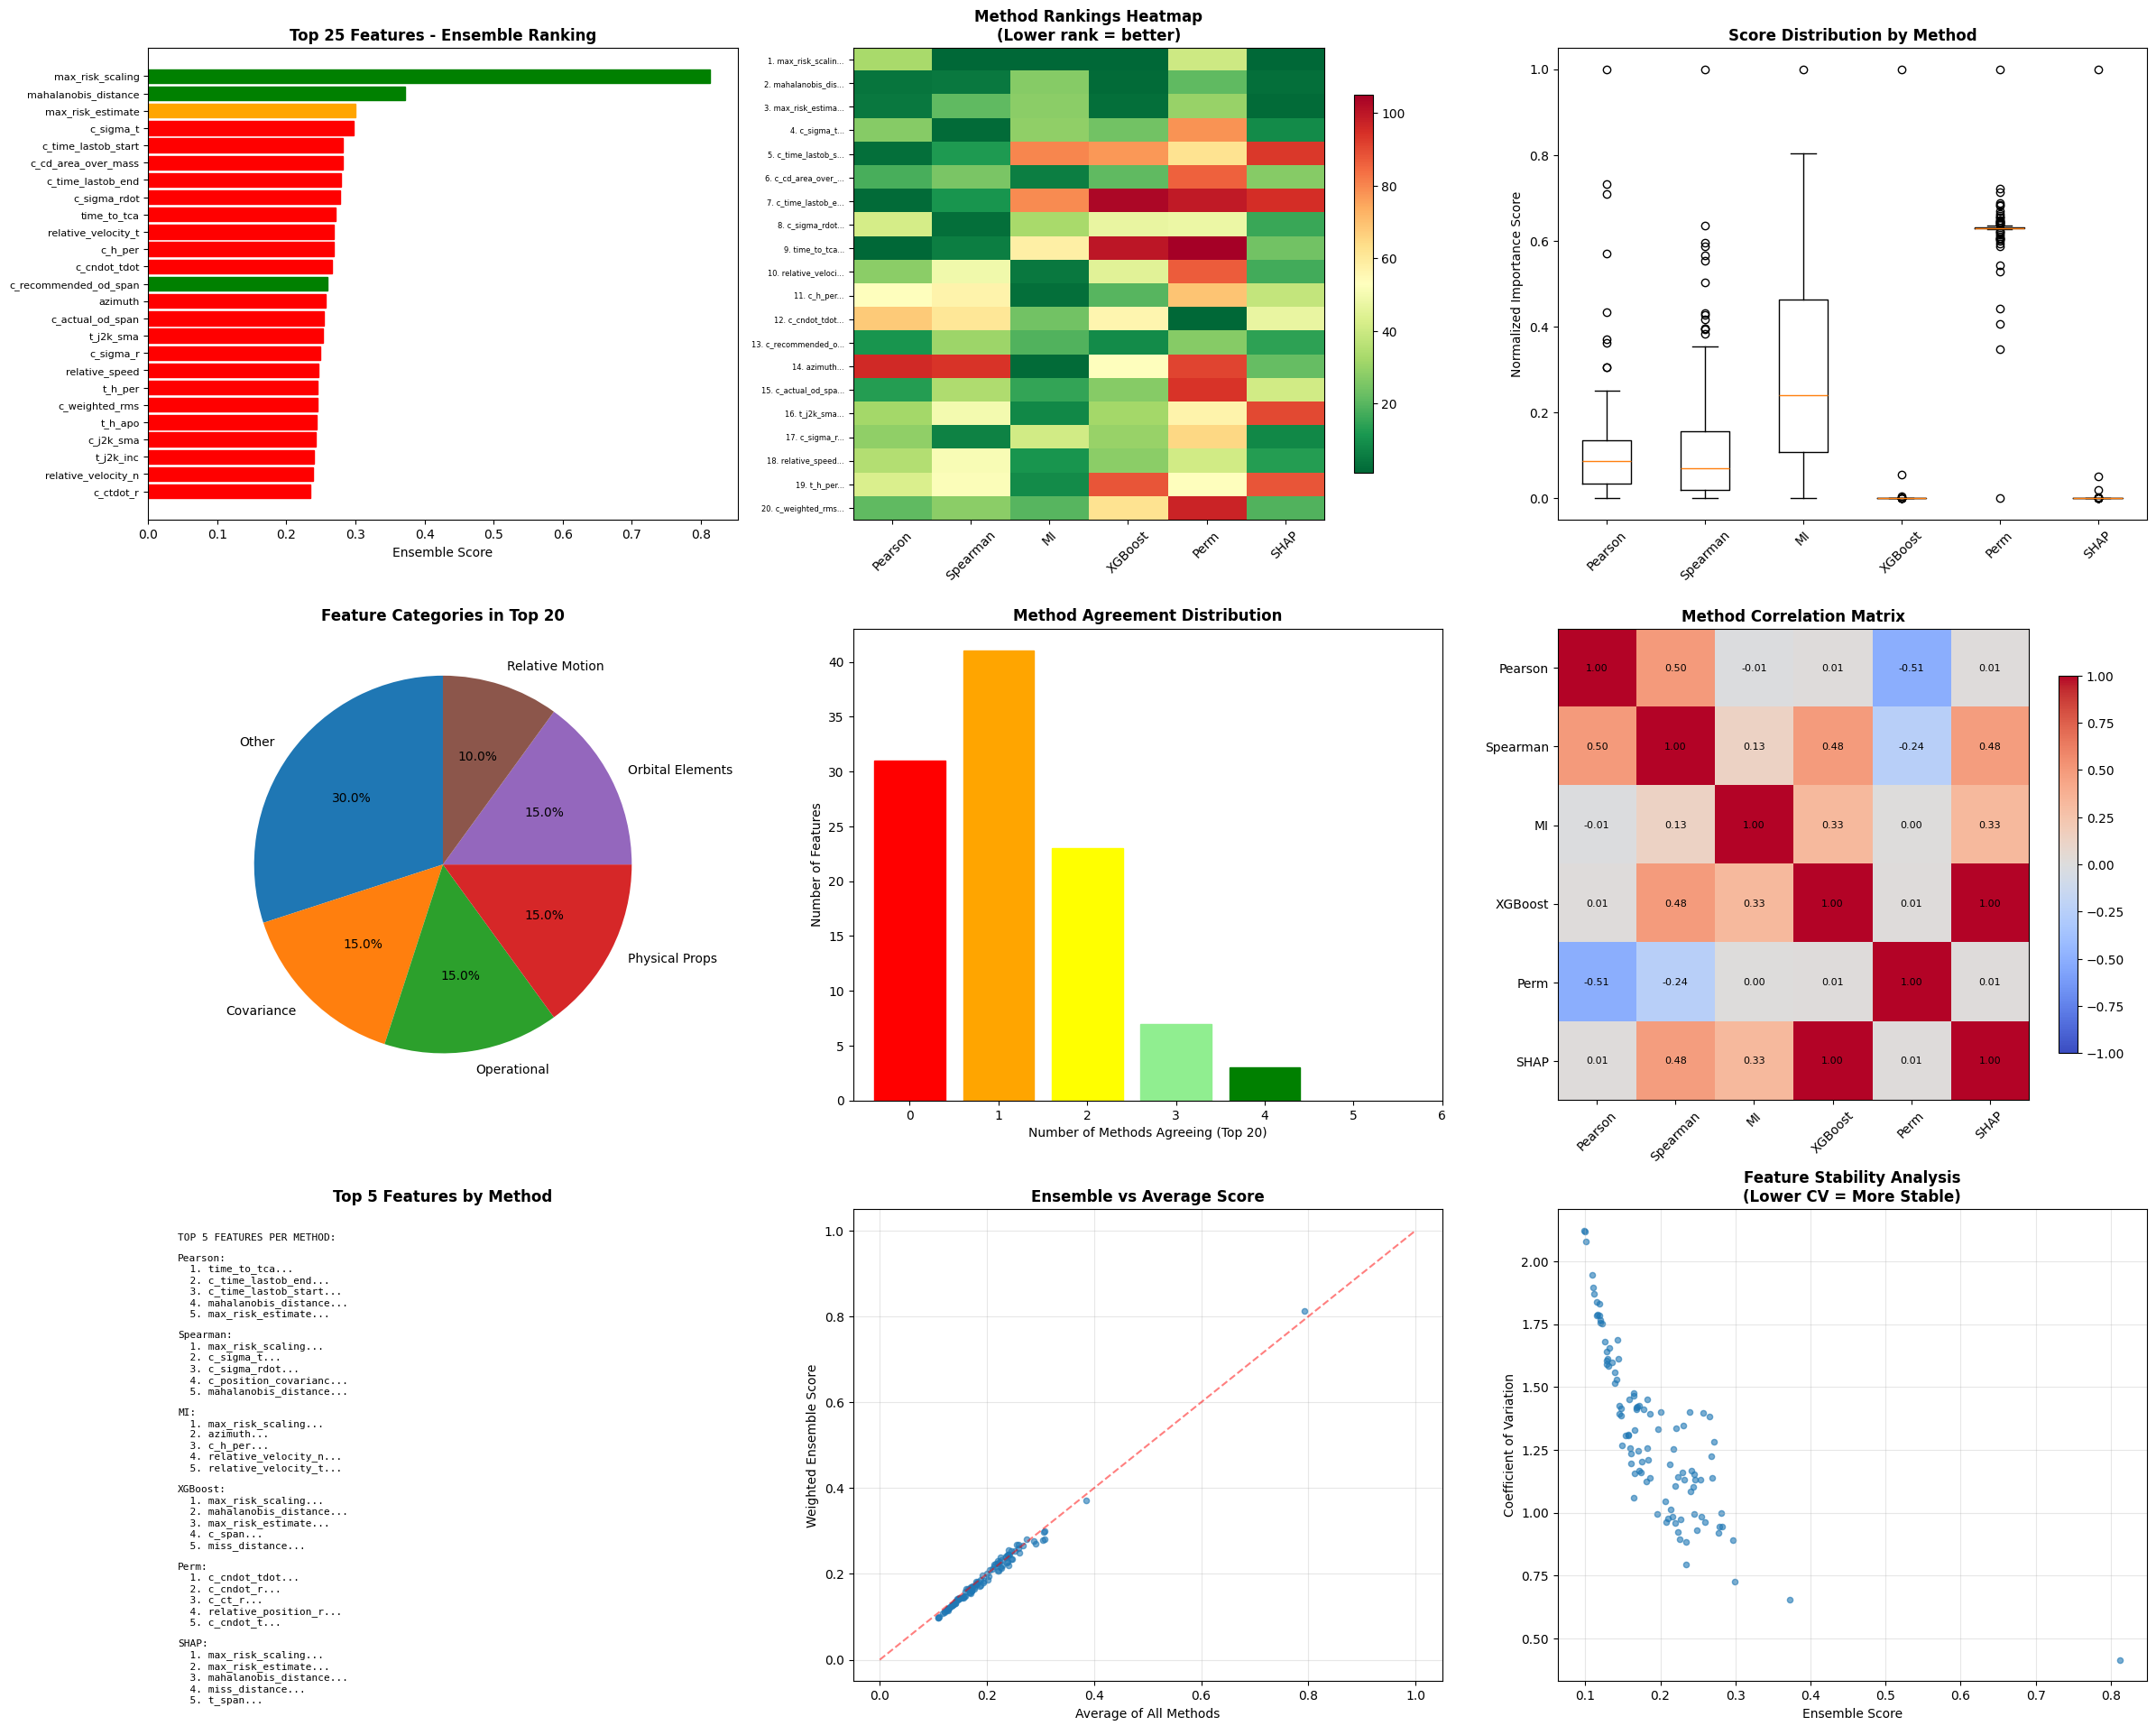

 Comprehensive dashboard created!


In [31]:
print("📊 Creating comprehensive results dashboard...")

# Create a large figure with multiple subplots
fig = plt.figure(figsize=(24, 20))

# 1. Ensemble ranking (top 25)
ax1 = plt.subplot(3, 3, 1)
top25_ensemble = final_ranking.head(25)
bars = ax1.barh(range(len(top25_ensemble)), top25_ensemble['ensemble_score'])
ax1.set_yticks(range(len(top25_ensemble)))
ax1.set_yticklabels(top25_ensemble['feature'], fontsize=8)
ax1.set_xlabel('Ensemble Score')
ax1.set_title('Top 25 Features - Ensemble Ranking', fontweight='bold')
ax1.invert_yaxis()

# Color bars by agreement level
for i, bar in enumerate(bars):
    agreement = top25_ensemble.iloc[i]['method_agreement']
    if agreement >= 5:
        bar.set_color('darkgreen')
    elif agreement >= 4:
        bar.set_color('green')
    elif agreement >= 3:
        bar.set_color('orange')
    else:
        bar.set_color('red')

# 2. Method comparison heatmap (top 20 features)
ax2 = plt.subplot(3, 3, 2)
top20_final = final_ranking.head(20)
method_rankings = np.zeros((20, 6))

for i, feature in enumerate(top20_final['feature']):
    # Get rank in each method (1-based)
    method_rankings[i, 0] = correlation_df_pearson.reset_index().index[correlation_df_pearson['feature'] == feature].tolist()[0] + 1
    method_rankings[i, 1] = correlation_df_spearman.reset_index().index[correlation_df_spearman['feature'] == feature].tolist()[0] + 1
    method_rankings[i, 2] = mi_df.reset_index().index[mi_df['feature'] == feature].tolist()[0] + 1
    method_rankings[i, 3] = xgb_df.reset_index().index[xgb_df['feature'] == feature].tolist()[0] + 1
    method_rankings[i, 4] = perm_df.reset_index().index[perm_df['feature'] == feature].tolist()[0] + 1
    method_rankings[i, 5] = shap_df.reset_index().index[shap_df['feature'] == feature].tolist()[0] + 1

im = ax2.imshow(method_rankings, cmap='RdYlGn_r', aspect='auto')
ax2.set_xticks(range(6))
ax2.set_xticklabels(['Pearson', 'Spearman', 'MI', 'XGBoost', 'Perm', 'SHAP'], rotation=45)
ax2.set_yticks(range(20))
ax2.set_yticklabels([f"{i+1}. {feat[:15]}..." for i, feat in enumerate(top20_final['feature'])], fontsize=6)
ax2.set_title('Method Rankings Heatmap\n(Lower rank = better)', fontweight='bold')
plt.colorbar(im, ax=ax2, shrink=0.8)

# 3. Score distributions
ax3 = plt.subplot(3, 3, 3)
methods_data = [
    master_df['pearson_norm'],
    master_df['spearman_norm'],
    master_df['mi_norm'],
    master_df['xgb_norm'],
    master_df['perm_norm'],
    master_df['shap_norm']
]
ax3.boxplot(methods_data, labels=['Pearson', 'Spearman', 'MI', 'XGBoost', 'Perm', 'SHAP'])
ax3.set_ylabel('Normalized Importance Score')
ax3.set_title('Score Distribution by Method', fontweight='bold')
ax3.tick_params(axis='x', rotation=45)

# 4. Feature categories analysis
ax4 = plt.subplot(3, 3, 4)
def categorize_feature(feature_name):
    """Categorize features based on naming patterns"""
    feature_lower = feature_name.lower()
    if any(x in feature_lower for x in ['sigma', 'covariance', 'correlation', 'cn_', 'ct_', 'cr_']):
        return 'Covariance'
    elif any(x in feature_lower for x in ['relative', 'miss_distance', 'velocity', 'position', 'speed']):
        return 'Relative Motion'
    elif any(x in feature_lower for x in ['ecc', 'inc', 'sma', 'apo', 'per', 'j2k']):
        return 'Orbital Elements'
    elif any(x in feature_lower for x in ['mass', 'area', 'span', 'rcs', 'cd_', 'cr_']):
        return 'Physical Props'
    elif any(x in feature_lower for x in ['f10', 'ap', 'f3m', 'ssn', 'geocentric']):
        return 'Environmental'
    elif any(x in feature_lower for x in ['obs_', 'od_', 'time_', 'residuals']):
        return 'Operational'
    else:
        return 'Other'

# Categorize top 20 features
top20_categories = [categorize_feature(feat) for feat in top20_final['feature']]
category_counts = pd.Series(top20_categories).value_counts()

wedges, texts, autotexts = ax4.pie(category_counts.values, labels=category_counts.index,
                                   autopct='%1.1f%%', startangle=90)
ax4.set_title('Feature Categories in Top 20', fontweight='bold')

# 5. Method agreement analysis
ax5 = plt.subplot(3, 3, 5)
agreement_counts = final_ranking['method_agreement'].value_counts().sort_index()
bars = ax5.bar(agreement_counts.index, agreement_counts.values)
ax5.set_xlabel('Number of Methods Agreeing (Top 20)')
ax5.set_ylabel('Number of Features')
ax5.set_title('Method Agreement Distribution', fontweight='bold')
ax5.set_xticks(range(7))

# Color bars
colors = ['red', 'orange', 'yellow', 'lightgreen', 'green', 'darkgreen', 'purple']
for bar, color in zip(bars, colors):
    bar.set_color(color)

# 6. Correlation matrix of methods
ax6 = plt.subplot(3, 3, 6)
method_corr_data = master_df[['pearson_norm', 'spearman_norm', 'mi_norm',
                              'xgb_norm', 'perm_norm', 'shap_norm']]
correlation_matrix = method_corr_data.corr()
im = ax6.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
ax6.set_xticks(range(6))
ax6.set_yticks(range(6))
ax6.set_xticklabels(['Pearson', 'Spearman', 'MI', 'XGBoost', 'Perm', 'SHAP'], rotation=45)
ax6.set_yticklabels(['Pearson', 'Spearman', 'MI', 'XGBoost', 'Perm', 'SHAP'])
ax6.set_title('Method Correlation Matrix', fontweight='bold')

# Add correlation values to heatmap
for i in range(6):
    for j in range(6):
        ax6.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                ha='center', va='center', fontsize=8)

plt.colorbar(im, ax=ax6, shrink=0.8)

# 7. Top features by each method
ax7 = plt.subplot(3, 3, 7)
method_top5 = {
    'Pearson': correlation_df_pearson.head(5)['feature'].tolist(),
    'Spearman': correlation_df_spearman.head(5)['feature'].tolist(),
    'MI': mi_df.head(5)['feature'].tolist(),
    'XGBoost': xgb_df.head(5)['feature'].tolist(),
    'Perm': perm_df.head(5)['feature'].tolist(),
    'SHAP': shap_df.head(5)['feature'].tolist()
}

# Create text display
text_content = "TOP 5 FEATURES PER METHOD:\n\n"
for method, features in method_top5.items():
    text_content += f"{method}:\n"
    for i, feat in enumerate(features, 1):
        text_content += f"  {i}. {feat[:20]}...\n"
    text_content += "\n"

ax7.text(0.05, 0.95, text_content, transform=ax7.transAxes, fontsize=8,
         verticalalignment='top', fontfamily='monospace')
ax7.set_xlim(0, 1)
ax7.set_ylim(0, 1)
ax7.axis('off')
ax7.set_title('Top 5 Features by Method', fontweight='bold')

# 8. Ensemble score vs individual methods
ax8 = plt.subplot(3, 3, 8)
# Plot ensemble score vs average of all methods
avg_score = master_df[['pearson_norm', 'spearman_norm', 'mi_norm',
                       'xgb_norm', 'perm_norm', 'shap_norm']].mean(axis=1)
ax8.scatter(avg_score, master_df['ensemble_score'], alpha=0.6, s=20)
ax8.plot([0, 1], [0, 1], 'r--', alpha=0.5)
ax8.set_xlabel('Average of All Methods')
ax8.set_ylabel('Weighted Ensemble Score')
ax8.set_title('Ensemble vs Average Score', fontweight='bold')
ax8.grid(True, alpha=0.3)

# 9. Feature stability analysis
ax9 = plt.subplot(3, 3, 9)
# Calculate coefficient of variation for each feature across methods
cv_scores = []
for _, row in master_df.iterrows():
    scores = [row['pearson_norm'], row['spearman_norm'], row['mi_norm'],
              row['xgb_norm'], row['perm_norm'], row['shap_norm']]
    cv = np.std(scores) / np.mean(scores) if np.mean(scores) > 0 else 0
    cv_scores.append(cv)

master_df['stability_cv'] = cv_scores
ax9.scatter(master_df['ensemble_score'], master_df['stability_cv'], alpha=0.6, s=20)
ax9.set_xlabel('Ensemble Score')
ax9.set_ylabel('Coefficient of Variation')
ax9.set_title('Feature Stability Analysis\n(Lower CV = More Stable)', fontweight='bold')
ax9.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(" Comprehensive dashboard created!")